**<font color=#000000 size=5>MNIST</font>**  

In [1]:
# fetch the MNIST dataset

import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, cache=True)

In [2]:
# target: str -> np.int8 and 
# sort the dataset by targets

mnist.target = mnist.target.astype(np.int8)  # fetch_openml() returns targets as strings

def sort_by_target(mnist):
    # fetch_openml() returns an unsorted dataset
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]  # the first 60,000
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]  # the last 10,000
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    
sort_by_target(mnist)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'p

In [3]:
# data and targets

X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


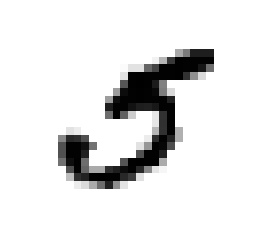

In [4]:
# take a peek at one digit from the dataset

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)  # reshape

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")  # cmap: colorful -> binary
plt.axis("off")
plt.show()

In [5]:
# split
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

In [6]:
# shuffle
shuffle_index = np.random.permutation(60_000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

1) to guarantee all cv folds will be similar.  
2) some algorithms are sensitive to the order of the training instances, and perform poorly if they get many similar instances in a row.

**<font color=#000000 size=5></font>**  

**<font color=#000000 size=5>Training a Binary Classifier</font>**  

In [7]:
# create the target vectors
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
# train a sgd clf
from sklearn.linear_model import SGDClassifier  # relies on randomness

sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf.fit(X_train, y_train_5)

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
# predict

sgd_clf.predict([some_digit])

array([ True])

**<font color=#000000 size=5>Performance Measures</font>**  

**<font color=#000000 size=3>Measuring Accuracy Using Cross-Validation</font>**

In [10]:
# cv

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")  # accuracy

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.96695, 0.9638 , 0.96535])

1) accuracy: ratio of correct predictions

In [11]:
# look at a very dumb classifier that just classifies every single image in the "not-5" class

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# train and cv
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9096 , 0.90875, 0.9106 ])

1) this is simply coz only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.  
this demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (when some classes are much more frequent than others).

**<font color=#000000 size=3>Confusion Matrix</font>**

1) the confusion matrix: the general idea is to count the number of times instances of class A are classified as class B

In [12]:
# get a set of predictions to compute the comfusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

In [13]:
# get the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54128,   451],
       [ 1627,  3794]], dtype=int64)

1) each row in a confusion matrix represents an actual class, while each column represents a predicted class.

true negatives&emsp;&emsp;false positives  
false negatives&emsp;&emsp;true positives  
  
2) a perfect clf would have only true positives and true negatives, so its function matrix would have nonzero values only on its main diagonal

precision: the accuracy of the positive predictions  
for all instances that are predicted as positives, how many instances are really positives.  

precision = $\frac{TP}{TP + FP}$  
  
recall / sensitivity / true positive rate (TPR): the ratio of positive instances that are correctly detected by the clf  
for all positive instances, how many instances are predicted correctly.  
  
 recall = $\frac{TP}{TP + FN}$

**<font color=#000000 size=3>Precision and Recall</font>**

In [14]:
# compute the precision and recall

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8937573616018846
0.699870872532743


F1 score: the harmonic mean of precision and recall. it gives much more weight to low values.  
the clf will only get a high F1 score if both recall and precision are high.  

$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 * \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}$

In [15]:
# compute the f1 score

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7850196565280365

**<font color=#000000 size=3>Precision/Recall Tradeoff</font>**

increasing precision reduces recall, and vice versa.

look at how the sgdclf makes its clf decisions. for each instances, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.  
  
the decision threshold is actually a score computed by the decision function.  

In [16]:
# get the decision scores used to make predictions

y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

threshold = 0  # set the threshold
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

[286.98106218]


array([ True])

In [17]:
# raise the threshold

threshold = 200_000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [18]:
# decide the threshold

# get the scores of all instances
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")  # shape: 60_000

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

In [19]:
# compute precision and recall for all possible thresholds (scores)
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

1) each score is treated as a threshold. the threshold is compared with each score and the prediction vector can be calculated. the precision and recall can thus be calculated.  there may be the same scores, thus the shape of the threshold vector is not the same as the number of instances of the dataset.

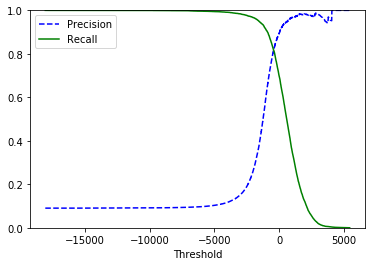

In [20]:
# plot precision and recall as functions of the threshold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

1) \[:-1\] in the func:   
The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold. This ensures that the graph starts on the y axis  
2) the precision curve is bumpier than the recall curve. the reason is that precision may sometimes go down when the threshold is risen. on the other hand, recall can only go down when the threshold is increased.  

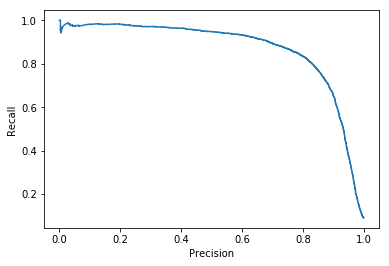

In [21]:
# another way to select a good precision/recall tradeoff is to plot precision directly against recall (the PR curve)

plt.plot(recalls, precisions)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()

1)
↗: better  
↙: worse

In [22]:
# get a 90% precision

y_train_pred_90 = (y_scores > 700)

# check the precision and recall
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9541284403669725
0.460431654676259


**<font color=#000000 size=3>The ROC Curve</font>**

the receiver operating characteristic (ROC) curve is another common tool used with binary class. it plots the true positive rate (TPR or recall) against the false positive rate (FPR or 1 - TNR (specificity)).   
$FPR = \frac{FP}{FP + TN} = 1 - \frac{TN}{FP + TN}(specificity)$

In [23]:
# compute the TPR and FPR for various threshold values

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

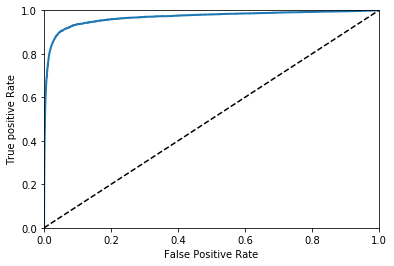

In [24]:
# plot the roc curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True positive Rate")
    
plot_roc_curve(fpr, tpr)
plt.show()

1) 
↖: better  
↘: worse  

In [25]:
# AUC: area under the curve. can be used to compare classifiers.  

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9678108791353786

pr or roc:  
pr: 
1) the positive class is rare  
2) care more about the FP than the FN  
roc:  
otherwise

In [26]:
# train a random forest clf

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1) due to the way it works, the random forest clf class does not have a decision_function() method. instead it has a predict_proba method. sklearn clf generally have one or the other.  
the predict_proba() method returns an array containing a row per instance and a col per class (the class is sorted by something like np.unique(label_vector)), each containing the probability that the given instance belongs to the given class

In [27]:
# use the positive class's prob as the score
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

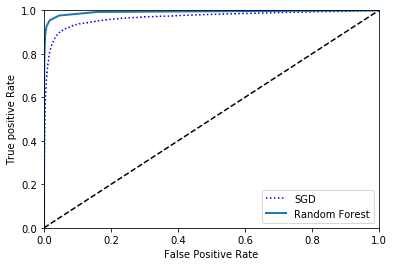

In [28]:
# plot the roc curve
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [29]:
# auc
roc_auc_score(y_train_5, y_scores_forest)

0.9925052562882275

**<font color=#000000 size=5>Multiclass Classification</font>**  

some algorithms are capable of handling multiple classes directly. others are strictly binary classifiers.  
  
perform multiclass clf using multiple binary clf  
1)one-versus-all (OvA) / one-versus-the-rest   
2)one-versus-one (OvO)  
the main advantage of OvO is that each clf only needs to be trained on the part of the training set for the two classes that it must distinguish.  
  
some algorithms (such as SVM) scale poorly with the size of the training set, so for these algorithms OvO is preferred.  
  
for most binary clf algorithms OvA is preferred.  
  
sklearn detects when you try to use a binary clf algorithm for a multiclass clf task, and it automatically runs OvA (except for SVM clf for which it uses OvO).

In [30]:
# train a multiclass sgdclf
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([5], dtype=int8)

1) sklearn trained 10 bin clf, got their decision scores for the image, and selected the class with the highest score.

In [31]:
# check the scores
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

print(np.argmax(some_digit_scores))
print(sgd_clf.classes_)
sgd_clf.classes_[5]

[[-1458.85130608 -4110.41306838 -1301.16899094 -1272.65164456
  -2486.15503425   286.98106218 -3469.67400378 -3540.83523002
  -3437.81964497 -4976.43953391]]
5
[0 1 2 3 4 5 6 7 8 9]


5

1) when a clf is trained, it stores the list of target classes in its classes_ attr, ordered by value.

In [32]:
# use the OneVsOneClassifier or OneVsRestClassifier to force sklearn to use OvO or OvA

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 a

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 a

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


45

sklearn does not have to run OvA or OvO coz Random Forest clf can directly classify instances into multiple classes

In [33]:
# train a random forest clf with multiple classes

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=int8)

In [34]:
# check the proba

forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0.1]])

In [35]:
# evaluate the sgd clf using cv

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.87707459, 0.8860443 , 0.8859829 ])

In [36]:
# scale the inputs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.87707459, 0.8860443 , 0.8859829 ])

**<font color=#000000 size=5>Error Analysis</font>**  

In [37]:
# conf mx
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([[5624,    0,   14,    6,    9,   41,   34,    8,  186,    1],
       [   1, 6428,   41,   21,    4,   43,    4,   10,  179,   11],
       [  28,   32, 5291,   88,   69,   26,   61,   41,  311,   11],
       [  31,   21,  112, 5245,    0,  211,   25,   44,  371,   71],
       [  13,   16,   45,   10, 5249,   10,   34,   28,  286,  151],
       [  33,   20,   30,  164,   54, 4524,   74,   19,  438,   65],
       [  31,   19,   49,    1,   37,   91, 5566,    5,  118,    1],
       [  18,   13,   53,   21,   48,   11,    4, 5730,  147,  220],
       [  19,   68,   48,   94,    3,  123,   35,    9, 5410,   42],
       [  26,   22,   27,   55,  130,   40,    1,  188,  311, 5149]],
      dtype=int64)

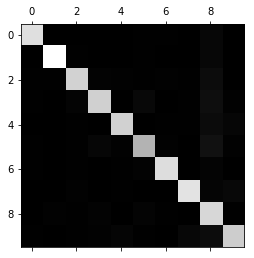

In [38]:
# look at an image repr of the conf mx
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

1) the brighter, the more instances are classified as values in that pos  
2) rows repr actual classes and clos repr predicted classes.

In [39]:
# focus the plot on the errors

# calculate error rates
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

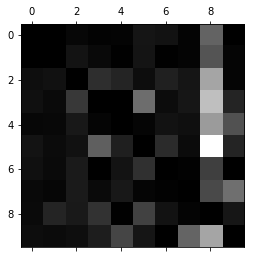

In [40]:
# fill the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

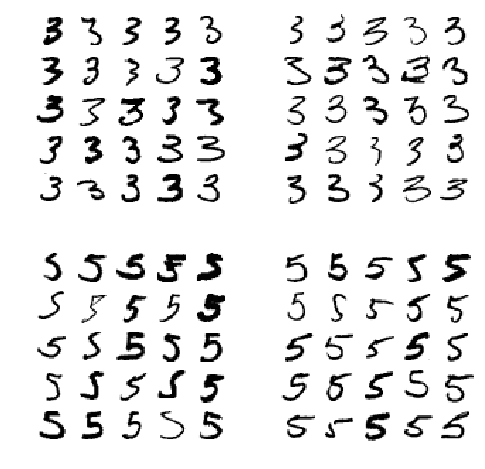

In [41]:
# analyze indivisual errors
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]  # "and" and "&" works similarly when the operands are boolean values
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)
plt.show()

**<font color=#000000 size=5>Multilabel Classification</font>**  

In [42]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_pred = knn_clf.predict([some_digit])
print(knn_pred)

# compute the average F1 score across all labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")  # average="weighted" to set the weights

[[False  True]]


0.977238296475781

1) the knn clf supports multilabel classification. not all clf do

**<font color=#000000 size=5>Multioutput Classification</font>**  

it is simply a generation of multilabel classification where each label can be multiclass (it can have more than two possible values)

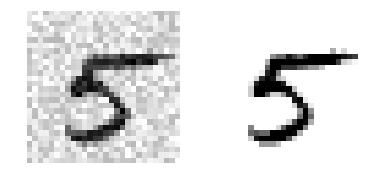

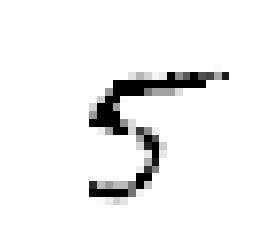

In [43]:
# build a system that removes noise from images

# add noise
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(X_test[some_index])
plt.show()

# clean the img
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)